# Density-Based Clustering with USA Arrest Data Set

## 1. Data Collection

**Description:**

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

The data set has 50 record stand for 50 US states and 4 variables as the following:
- **Murder**: Murder arrests (per 100 000) 
- **Assault**: Assault arrests (per 100 000) 
- **Rape** : Rape arrests (per 100 000)
- **UrbanPop**: Percent urban population


## 2. Data Presentation

In [99]:
dat_raw = USArrests
head(dat_raw)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

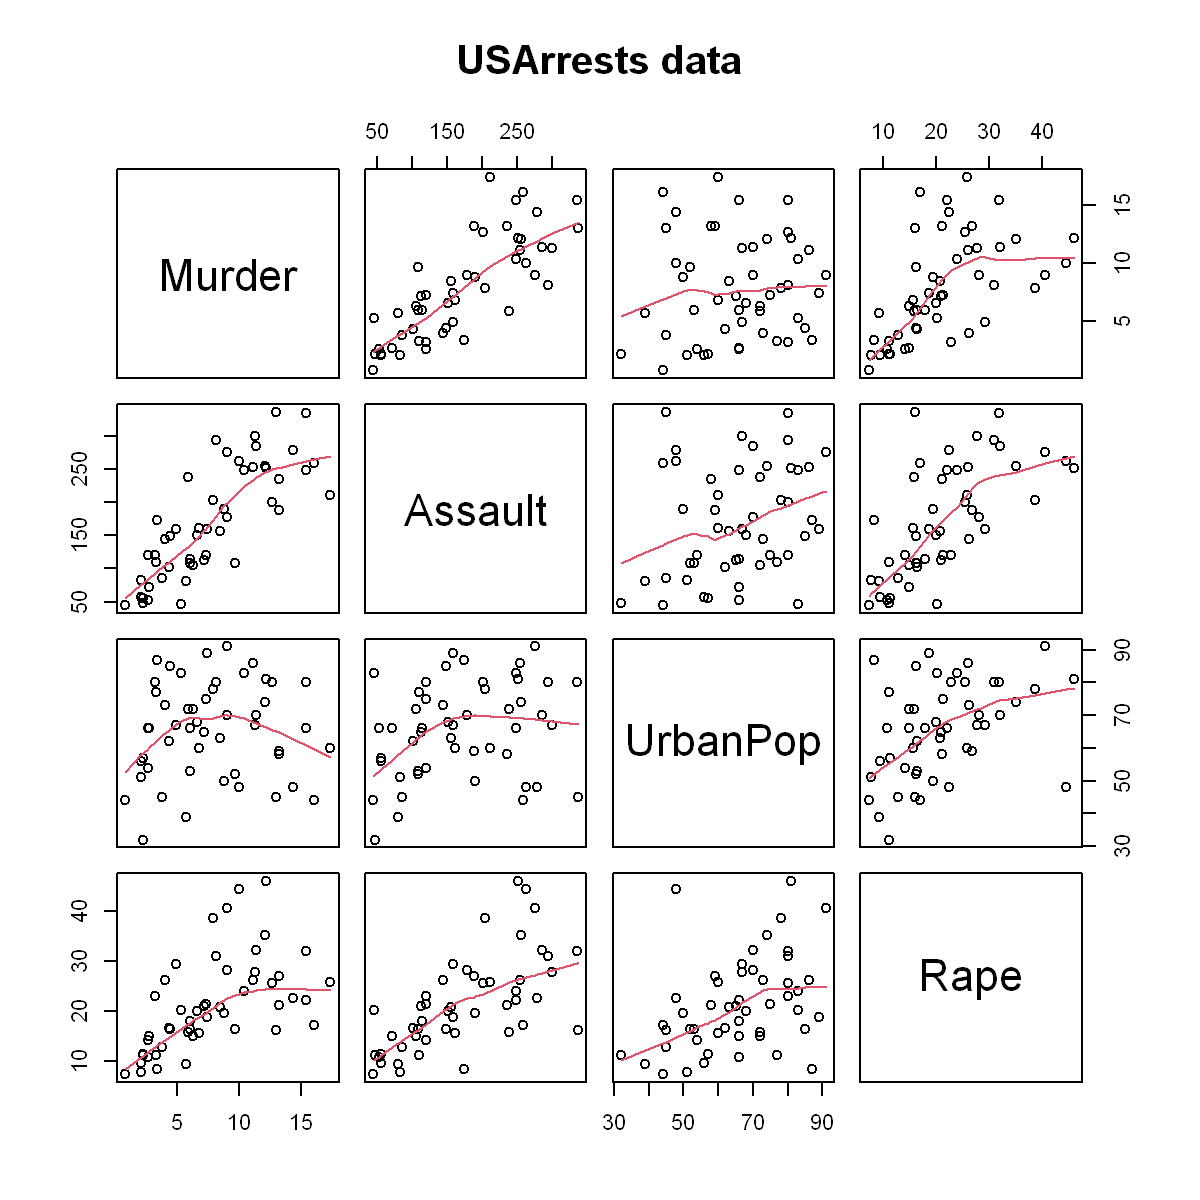

In [100]:
summary(dat_raw)
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 200)
require(graphics)
pairs(dat_raw, panel = panel.smooth, main = "USArrests data")

## 3. Analysis and Interpretation

### 3.1. Analysis with K-mean Methods

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



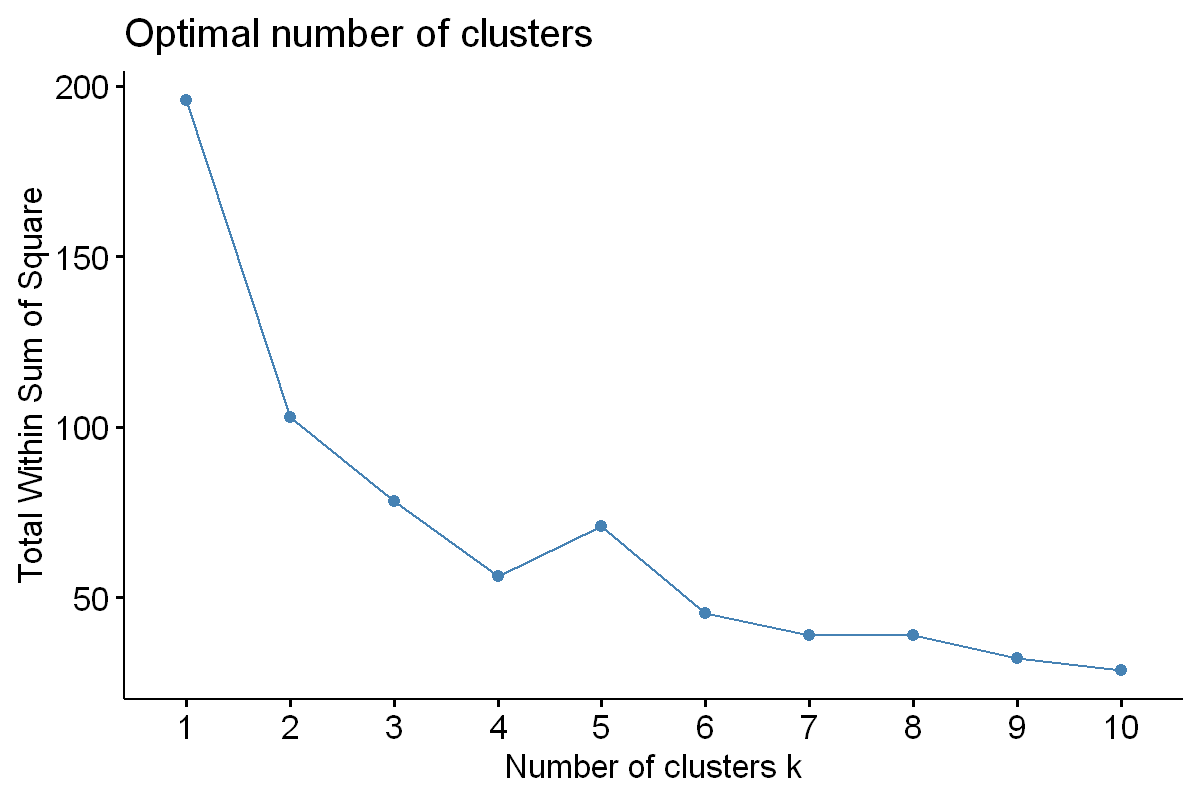

In [101]:
#install.packages("factoextra")
#install.packages("NbClust")
require(factoextra)
require(NbClust)
dat = scale(dat_raw)
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
fviz_nbclust(dat, kmeans, method = "wss") + geom_line()

#### Chọn k = 4, số cụm ít, sự khác biệt giữa các cá thể trong cụm cũng ít.

             Length Class  Mode   
cluster      50     -none- numeric
centers      16     -none- numeric
totss         1     -none- numeric
withinss      4     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          4     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric

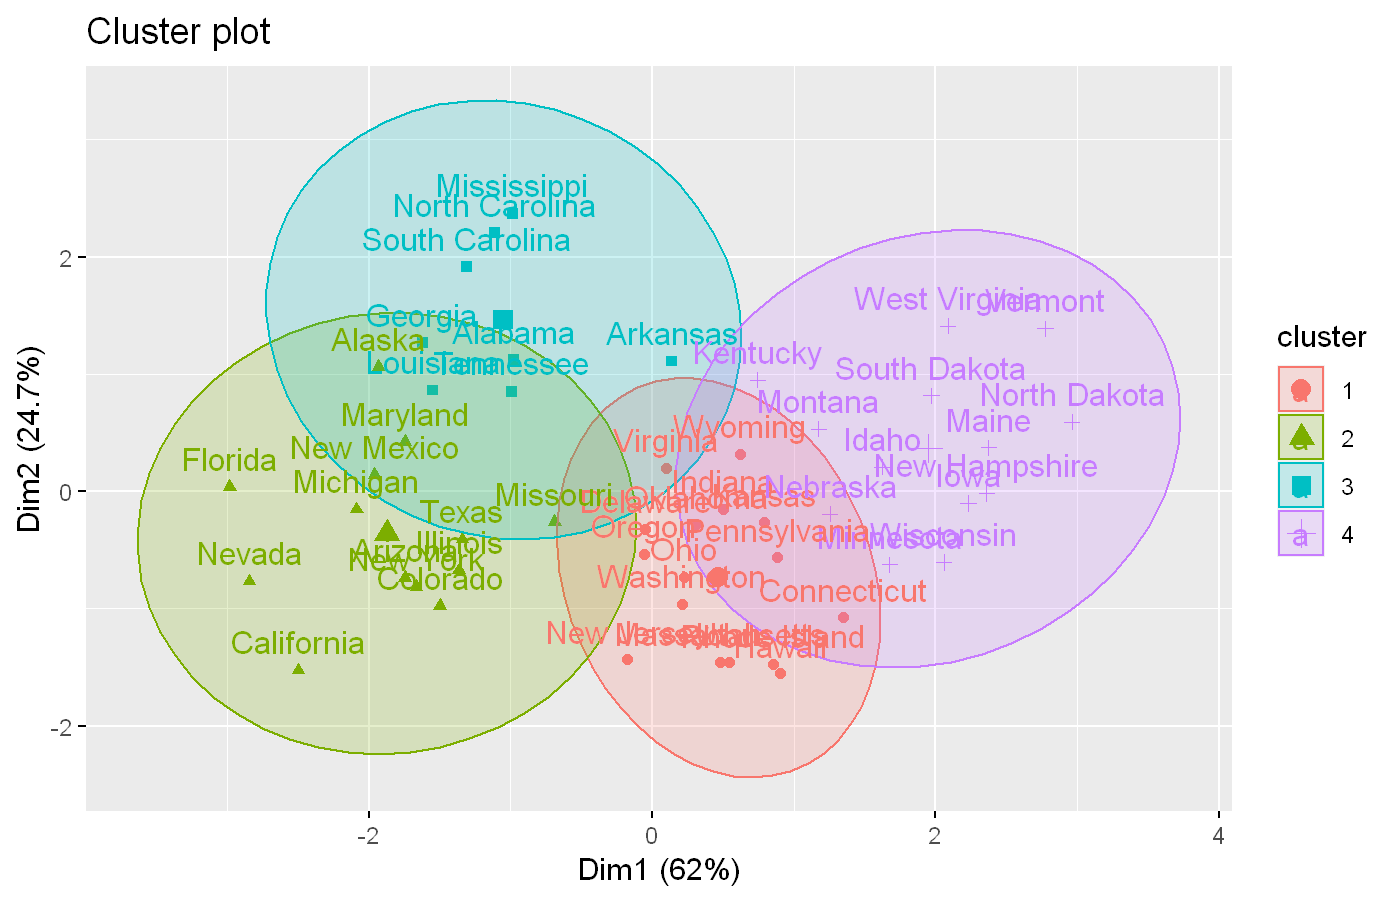

In [106]:
km = kmeans(dat,centers = 4)
options(repr.plot.width = 7, repr.plot.height = 4.5, repr.plot.res = 200)
fviz_cluster(km, dat, ellipse.type = "norm")
summary(km)

In [103]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 200)
plot(km,dat_raw)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


### 3.2. Analysis with Density-Based Methods

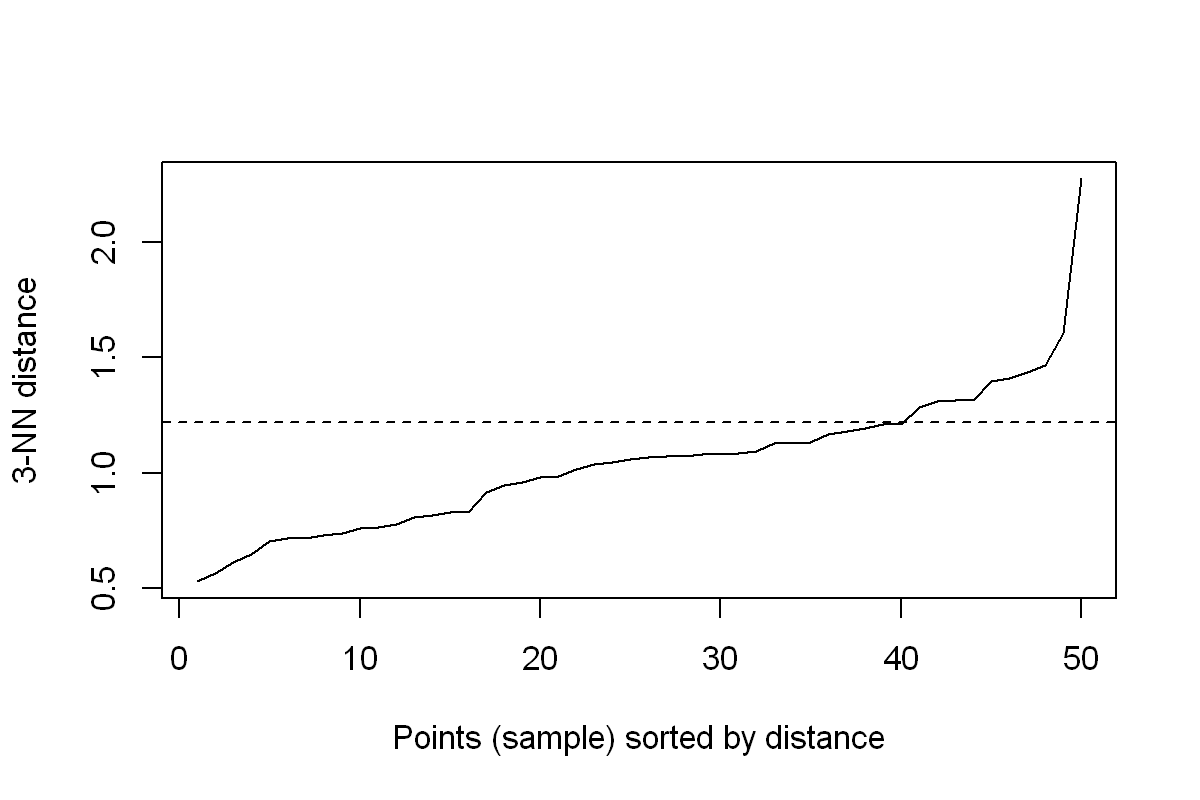

In [124]:
#install.packages("fpc")
require(fpc)
#Obtaining optimal Eps value
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
kNNdistplot(dat, k = 3)
abline(h=1.22,lty=2)

In [121]:
#Density-Based Clustering with DBSCAN
set.seed(123)
res <- fpc::dbscan(dat
                   ,eps=1.22
                   ,MinPts=5)
res

dbscan Pts=50 MinPts=5 eps=1.22
       0 1 2  3
border 7 4 5  8
seed   0 1 1 24
total  7 5 6 32

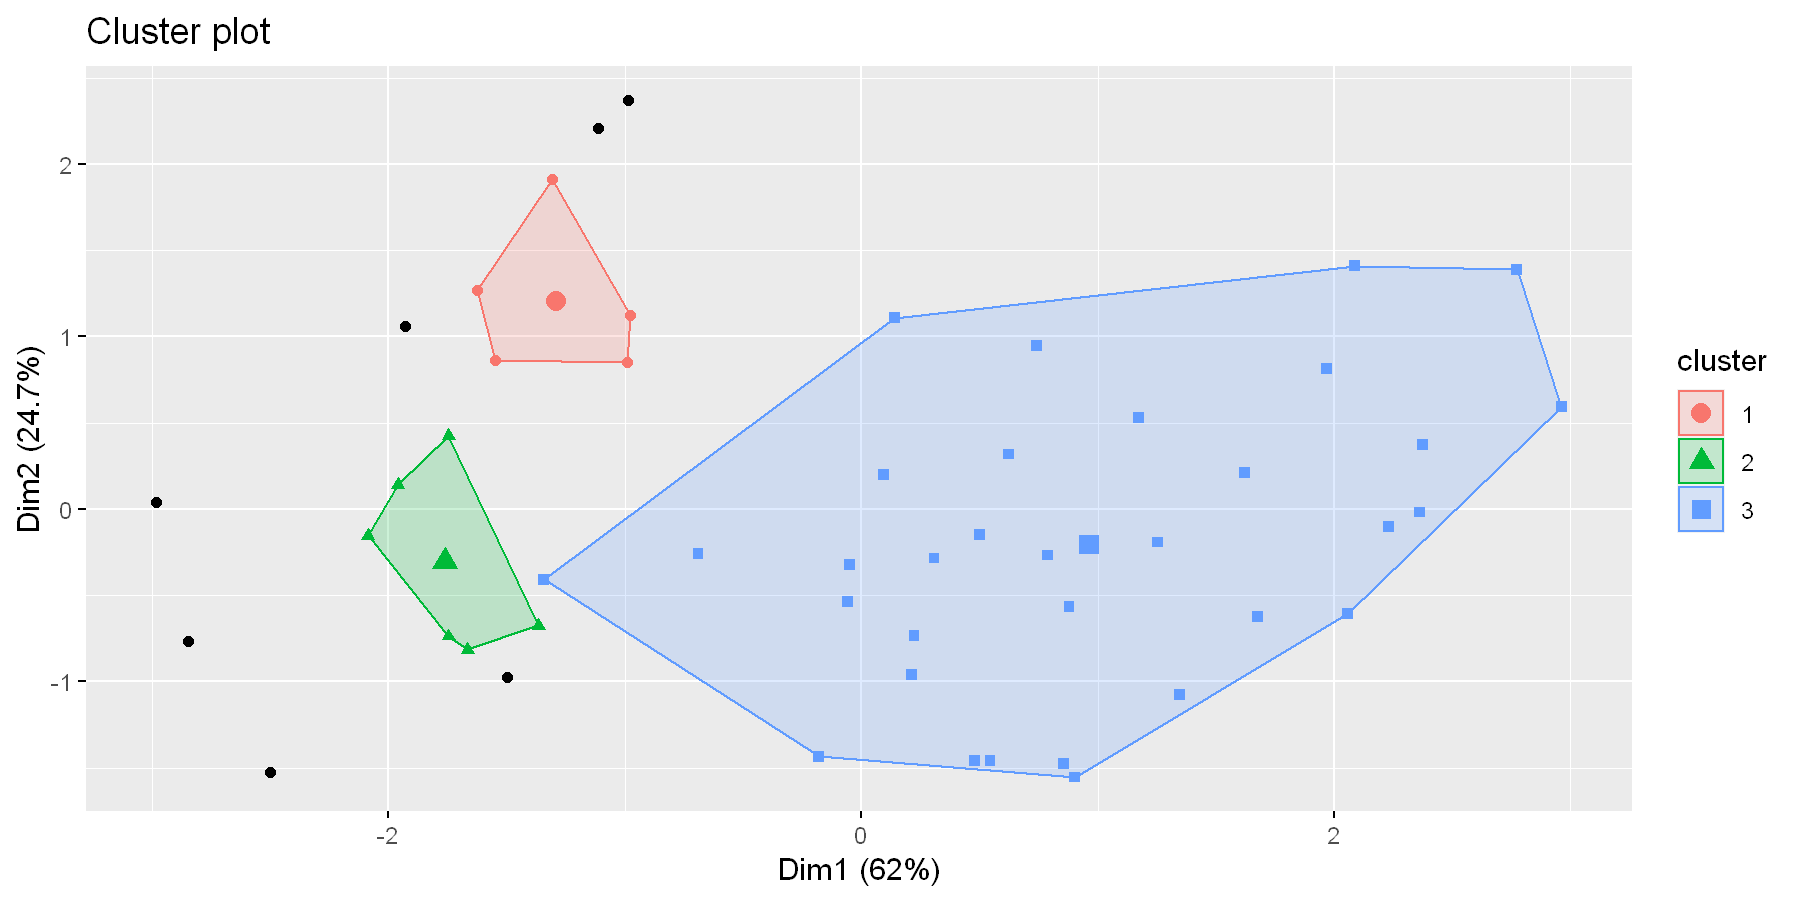

In [122]:
options(repr.plot.width = 9, repr.plot.height = 4.5, repr.plot.res = 200)
fviz_cluster(res,dat,geom = "point")

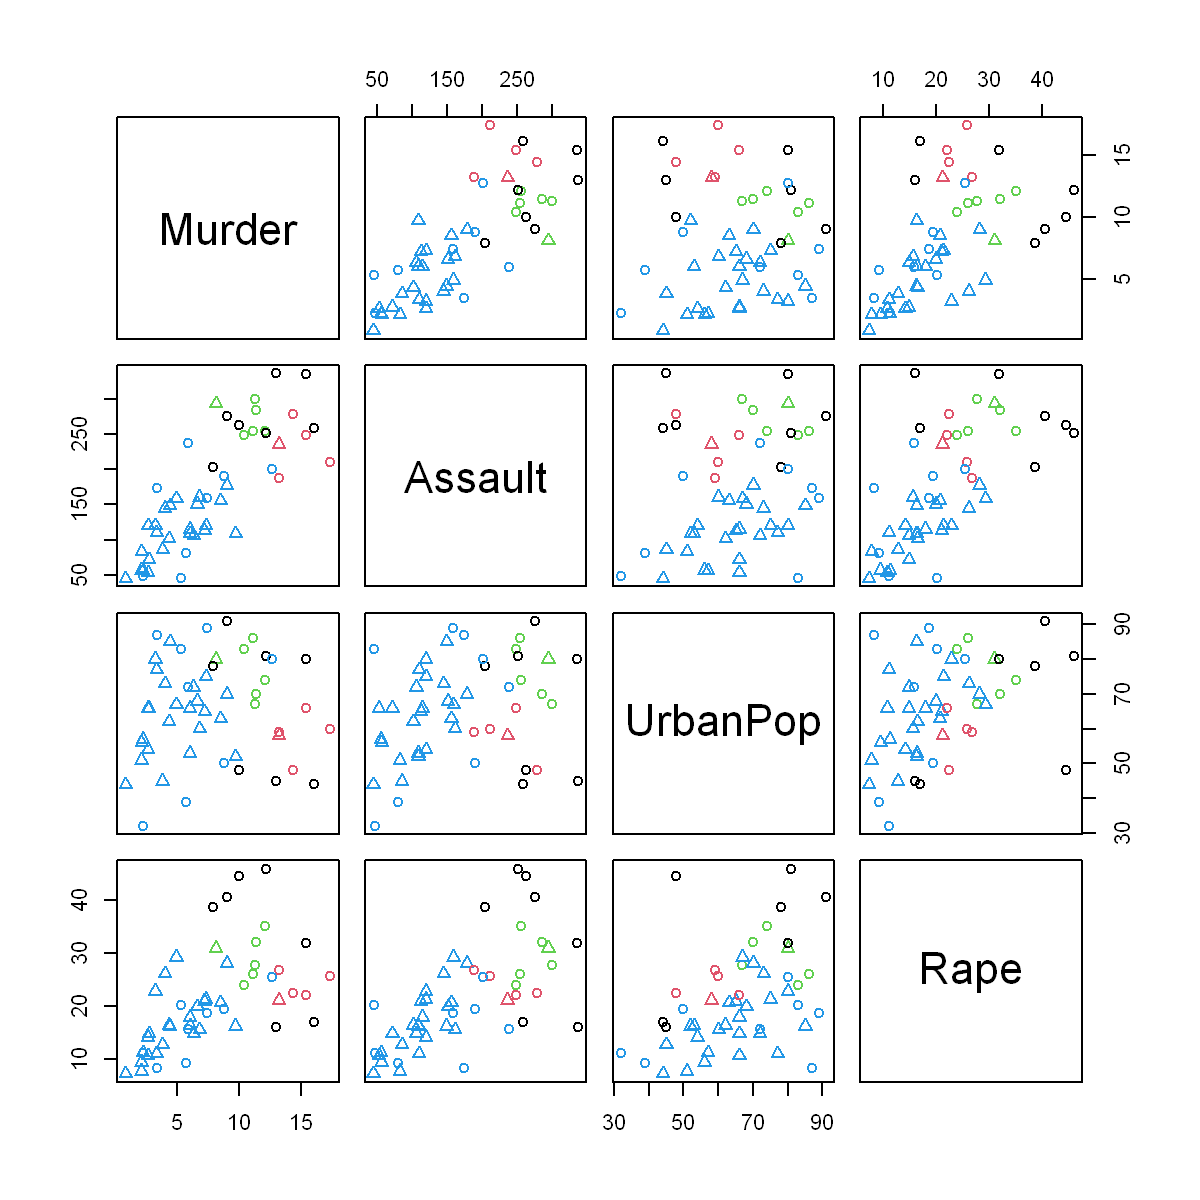

In [128]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 200)
plot(res,dat_raw)